In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsmath}'})

import numpy as np
import pandas as pd
import uproot4 as up

from nicks_plot_utils import Hist2D, Hist1D

from lmfit.models import Model
import matplotlib.gridspec as gridspec

import boost_histogram as bh

In [2]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

COLOR_BLUE=plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
COLOR_RED=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
COLOR_DGREEN=plt.rcParams['axes.prop_cycle'].by_key()['color'][3]


['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']


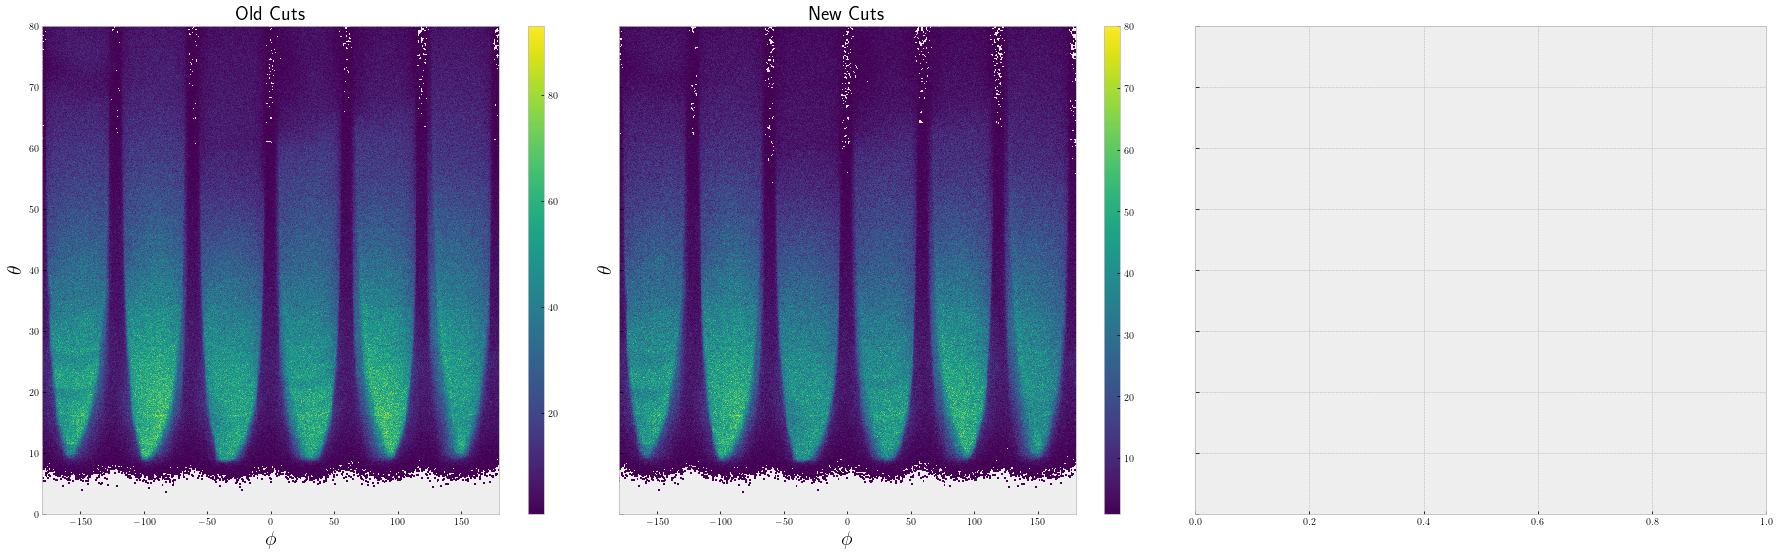

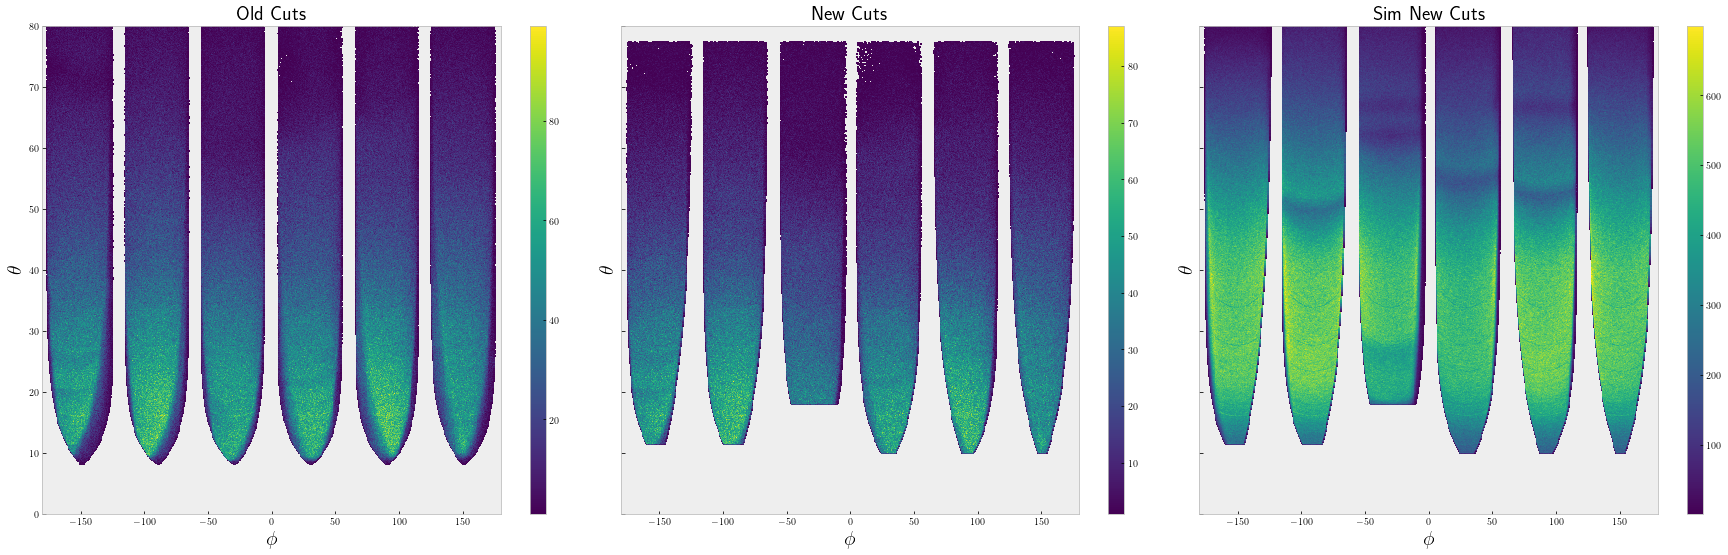

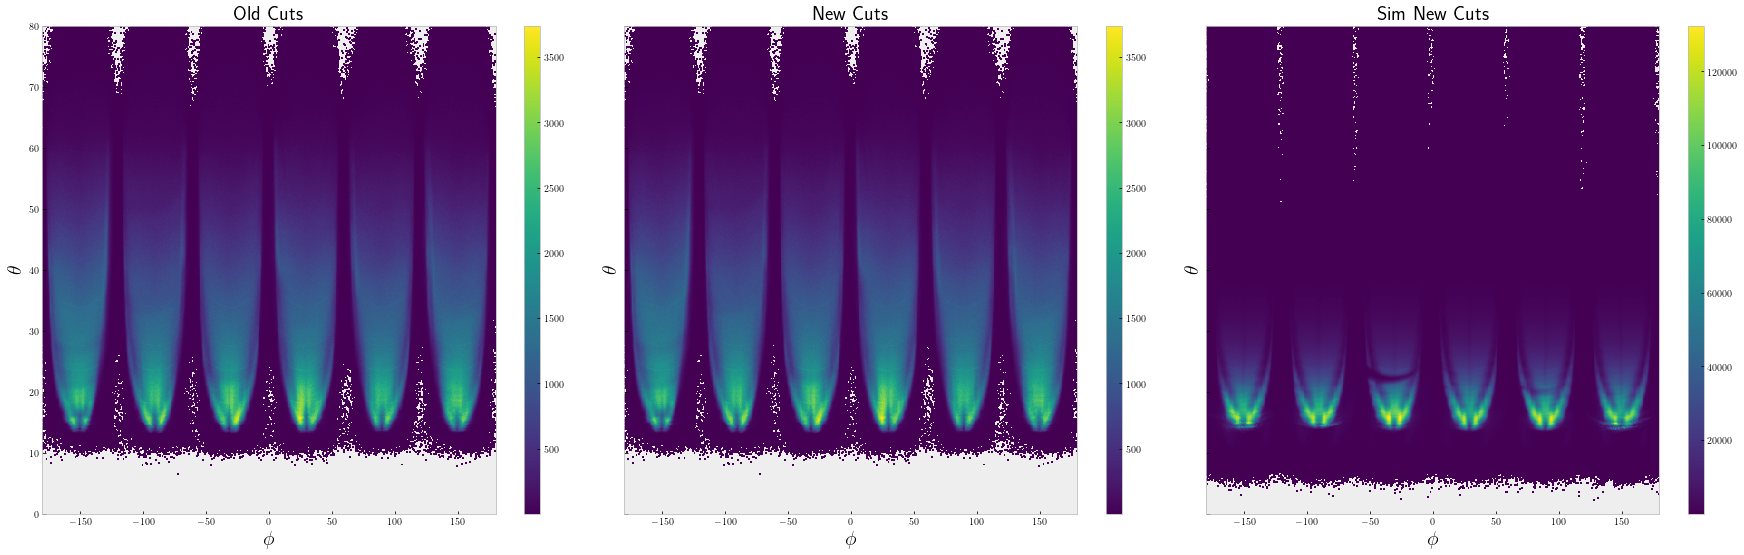

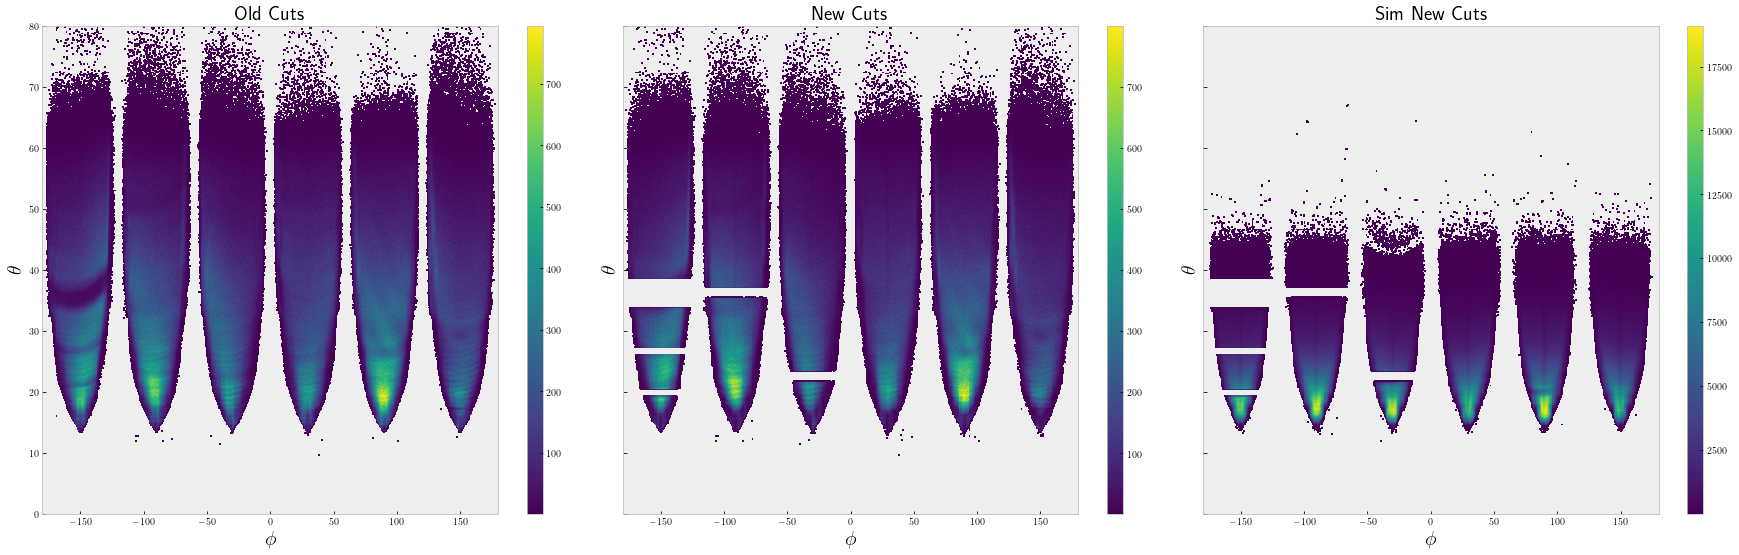

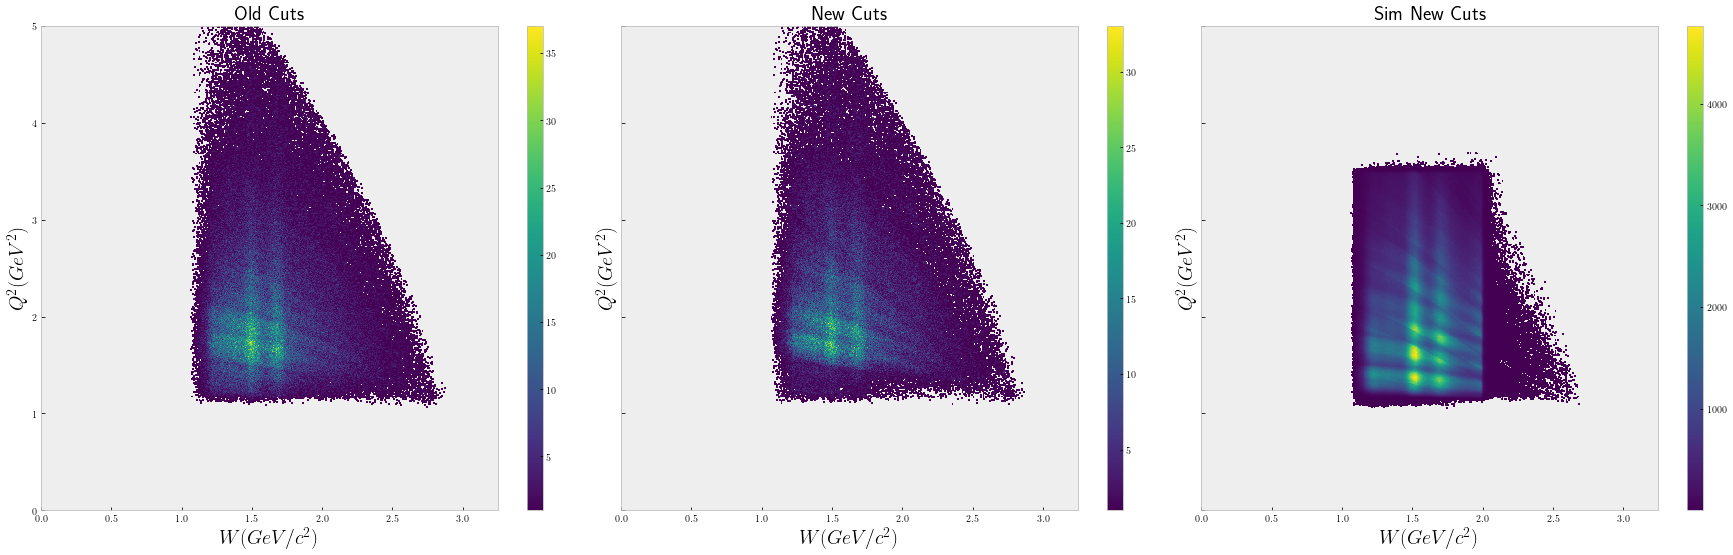

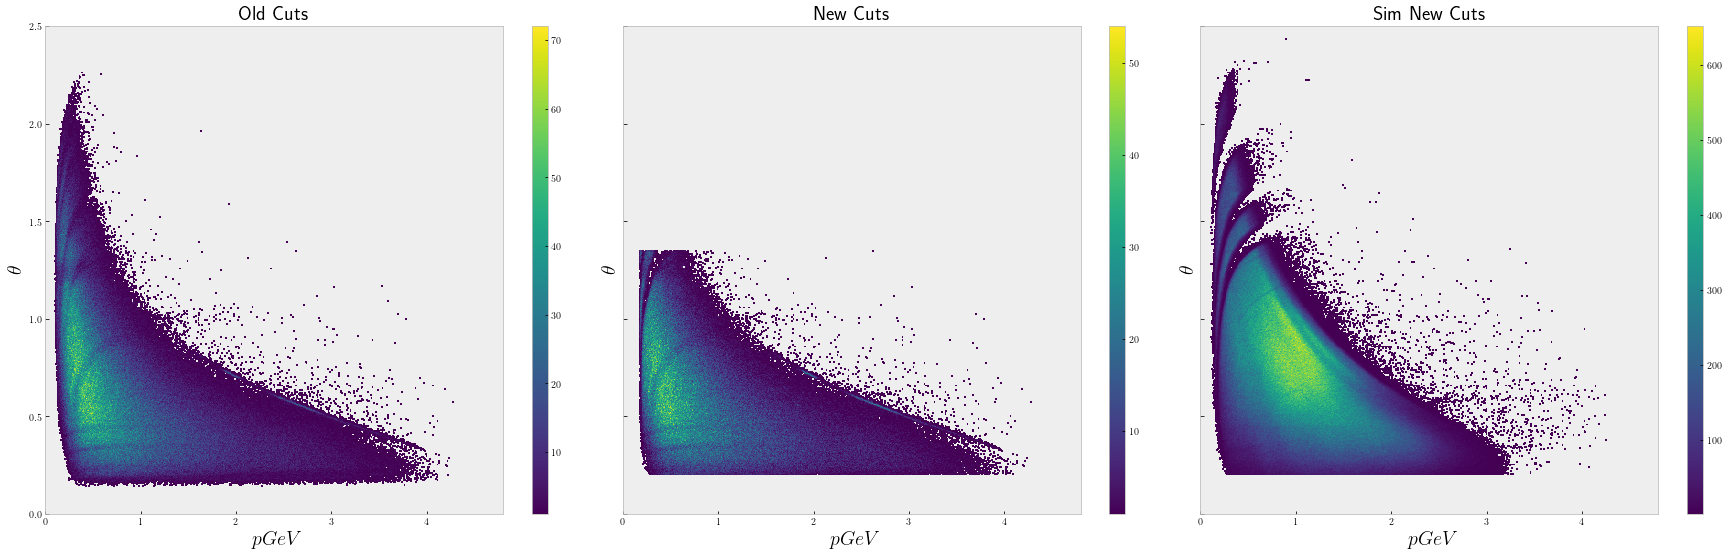

In [36]:
plots = ["Fid_cuts/pip_fid_precut", "Fid_cuts/pip_fid", "Fid_cuts/electron_fid", "Fid_cuts/electron_fid_cut", "W vs Q2/WvsQ2_channel", "Fid_cuts/pip_theta_p_5"]

for plot in plots:
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[25,8], sharey=True, tight_layout=True)
    old = up.open(f"/Users/tylern/Desktop/show/old_cuts.root:{plot}").to_boost()
    new = up.open(f"/Users/tylern/Desktop/show/today.root:{plot}").to_boost()
    

    xname = old.axes[0].metadata['title'].replace("#", "\\")
    yname = old.axes[1].metadata['title'].replace("#", "\\")
    
    hist = Hist2D(boost_hist=old, xname=f"${xname}$", yname=f"${yname}$")
    hist.plot(ax[0], colorbar=True, density=False, zeros=False)
    ax[0].set_title("Old Cuts")

    hist = Hist2D(boost_hist=new,xname=f"${xname}$", yname=f"${yname}$")
    hist.plot(ax[1], colorbar=True, density=False, zeros=False)
    ax[1].set_title("New Cuts")
    try:
        sim = up.open(f"/Users/tylern/Desktop/show/plots/e1d_sim.root:{plot}").to_boost()
        hist = Hist2D(boost_hist=sim,xname=f"${xname}$", yname=f"${yname}$")
        hist.plot(ax[2], colorbar=True, density=False, zeros=False)
        ax[2].set_title("Sim New Cuts")
    except up.KeyInFileError:
        pass
    
    plt.show()

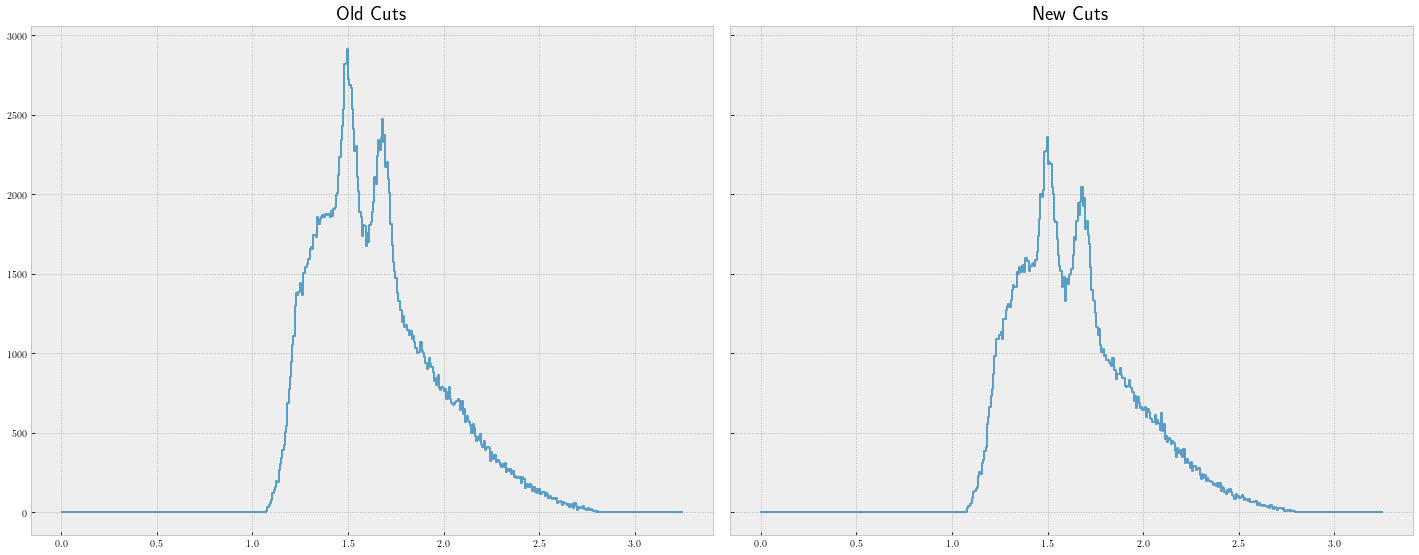

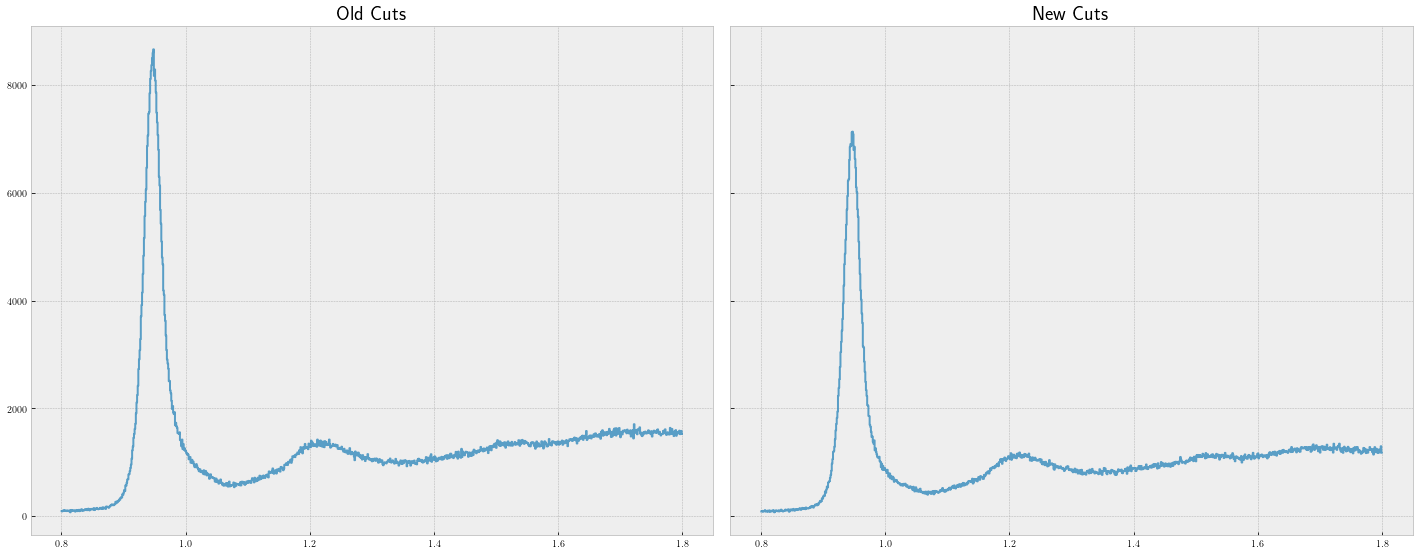

In [32]:
plots = ["W vs Q2/W_channel", "Missing_Mass/Missing_Mass_small"]

for plot in plots:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20,8], sharey=True, tight_layout=True)
    old = up.open(f"/Users/tylern/Desktop/show/old_cuts.root:{plot}").to_boost()
    new = up.open(f"/Users/tylern/Desktop/show/today.root:{plot}").to_boost()

    xname = old.axes[0].metadata['title'].replace("#", "\\")
    
    hist = Hist1D(boost_hist=old, xname=f"${xname}$")
    hist.histogram(ax[0], density=False)
    ax[0].set_title("Old Cuts")

    hist = Hist1D(boost_hist=new, xname=f"${xname}$")
    hist.histogram(ax[1], density=False)
    ax[1].set_title("New Cuts")
    
    plt.show()


